In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
knn_naive = pd.read_csv("../results/output_places_US_knn_naive.csv")
knn_naive['name'] = "Naive"
# seacnn = pd.read_csv("../results/output_places_US_knn_seacnn.csv")
# seacnn['name'] = "SEA-CNN"
seacnn_fixed = pd.read_csv("../results/output_places_US_knn_seacnn_fixed.csv")
seacnn_fixed['name'] = "SEA-CNN"
seacnn_fixed_v2 = pd.read_csv("../results/output_places_US_knn_seacnn_mem.csv")
seacnn_fixed_v2['name'] = "SEA-CNN Opt."

res = pd.concat([
    knn_naive.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    # seacnn.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    seacnn_fixed.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    seacnn_fixed_v2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

res

,creation_time,search_time,num_queries,name
0,172846812,12052553419,100000,Naive
1,490011624,92903556845,500000,Naive
2,901933066,198031281350,1000000,Naive
3,1940748131,419322909181,2500000,Naive
4,210519521,11660142249,100000,Naive
5,606187893,87374653715,500000,Naive
6,867310701,209452007862,1000000,Naive
7,2446234806,550983418726,2500000,Naive
8,295598693,8850511595,100000,Naive
9,442297750,72661776036,500000,Naive


In [28]:
# def expName(x):
#     if x == "places":
#         return "0% KNN Queries"
#     elif x == "places_knn_05":
#         return "5% KNN Queries"
#     elif x == "places_knn_10":
#         return "10% KNN Queries"

<AxesSubplot:xlabel='No. of queries', ylabel='Index creation time (sec)'>

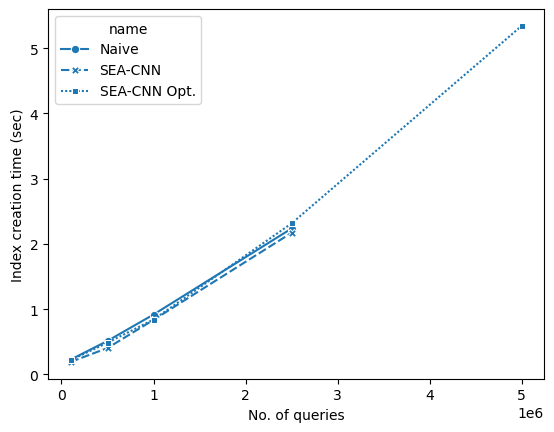

In [29]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [30]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
1,490011624,185807.113690,500000,Naive
5,606187893,174749.307430,500000,Naive
9,442297750,145323.552072,500000,Naive
1,508063330,46287.268450,500000,SEA-CNN
5,351706222,30635.578556,500000,SEA-CNN
9,350459937,29697.464016,500000,SEA-CNN
1,556421478,35220.250694,500000,SEA-CNN Opt.
5,448485254,47149.655372,500000,SEA-CNN Opt.
9,419815334,36998.001984,500000,SEA-CNN Opt.
13,449194425,50961.283884,500000,SEA-CNN Opt.


In [31]:
res[res['num_queries'] == 1000000]

,creation_time,search_time,num_queries,name
2,901933066,198031281350,1000000,Naive
6,867310701,209452007862,1000000,Naive
10,981890953,211491503497,1000000,Naive
2,968625210,47523873781,1000000,SEA-CNN
6,794231639,36366616500,1000000,SEA-CNN
10,742741071,31416449814,1000000,SEA-CNN
2,959674194,39164051445,1000000,SEA-CNN Opt.
6,806013521,46094396757,1000000,SEA-CNN Opt.
10,735714343,46486870093,1000000,SEA-CNN Opt.
14,746612344,44532614628,1000000,SEA-CNN Opt.


<AxesSubplot:xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

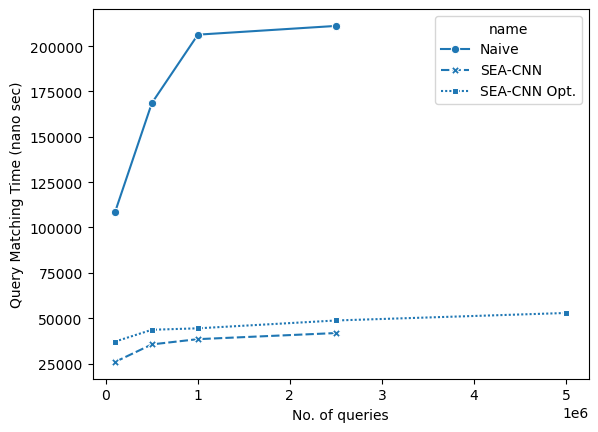

In [32]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', style='name', data=search_res, errorbar=None, markers=True)

In [33]:
# Optimization
# - Custom iterator
# - Circle bound calculation